<a href="https://colab.research.google.com/github/pix2712/Cifar100/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


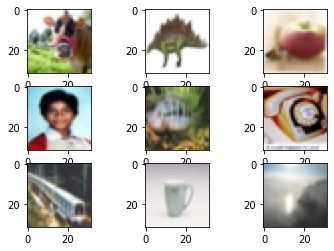

In [ ]:
import matplotlib.pyplot as plt


for i in range (9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255 #x_train/=255
x_test = x_test/255

y_train = to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer = 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(100,activation = 'softmax'))

opt = SGD(learning_rate=0.01,momentum = 0.9)
model.compile(opt,loss = 'categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs=25,batch_size =64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/25
782/782 [==============================] - 18s 9ms/step - loss: 4.4656 - accuracy: 0.0264 - val_loss: 4.2551 - val_accuracy: 0.0542
Epoch 2/25
782/782 [==============================] - 7s 9ms/step - loss: 4.0344 - accuracy: 0.0785 - val_loss: 3.8129 - val_accuracy: 0.1216
Epoch 3/25
782/782 [==============================] - 7s 9ms/step - loss: 3.7044 - accuracy: 0.1279 - val_loss: 3.6228 - val_accuracy: 0.1492
Epoch 4/25
782/782 [==============================] - 7s 9ms/step - loss: 3.4543 - accuracy: 0.1700 - val_loss: 3.2489 - val_accuracy: 0.2180
Epoch 5/25
782/782 [==============================] - 7s 9ms/step - loss: 3.2620 - accuracy: 0.2094 - val_loss: 3.1073 - val_accuracy: 0.2465
Epoch 6/25
782/782 [==============================] - 7s 9ms/step - loss: 3.1037 - accuracy: 0.2334 - val_loss: 3.0097 - val_accuracy: 0.2654
Epoch 7/25
782/782 [==============================] - 7s 9ms/step - loss: 2.9604 - accuracy: 0.2629 - val_loss: 2.7897 - val_accuracy: 0.3068
Epoch

In [ ]:
model.save('cifar100.h5')

In [ ]:
model5= load_model('/content/cifar100.h5')


(1, 32, 32, 3)

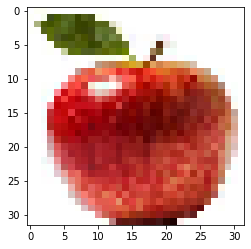

In [ ]:
from keras.preprocessing.image import  load_img,img_to_array
import numpy as np

filename = '/content/apple1.jpg'
img = load_img(filename,target_size=(32,32))
img.size
plt.imshow(img)
img=img_to_array(img)
img=np.reshape(img,(1,32,32,3))
img = img.astype('float32')
img = img/255
img.shape

In [ ]:
np.argmax(model5.predict(img),axis=1)

array([83])

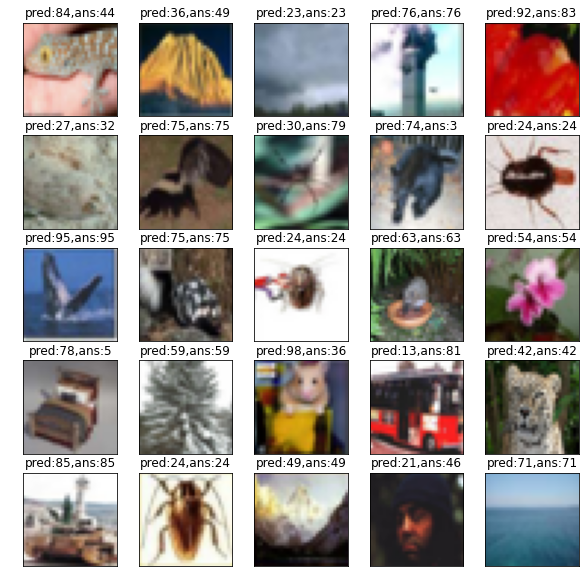

In [ ]:

predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
classes_x1=np.argmax(y_test,axis=1)
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,10000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_test[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
  
    plt.title('pred:{0},ans:{1}'.format(classes_x[rand_num],classes_x1[rand_num]))
 
plt.show()